In [2]:
import numpy as np
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

np.set_printoptions(precision=3)

#### Types of errors:


|$H_0$|    Don't reject $H_0$| Reject $H_0$| 
|-|-|-|
|$H_0$ is True|No Error|Type I Error|
|$H_0$ is False|Type II Error| No Error|


In terms of probabilities:

|$H_0$|    Don't reject $H_0$| Reject $H_0$| 
|-|-|-|
|$H_0$ is True|$1-\alpha$|$\alpha$|
|$H_0$ is False|$\beta$| $1-\beta$|

Why is the probability of Type II error not related to $\alpha$?


Because it is coming from a different distribution, not the one of $H_0$. 

In other words, $\beta$ is the probability to get the result of our experiment, but for the correct distribution where our sample comes from, not the one assumed by $H_0$.

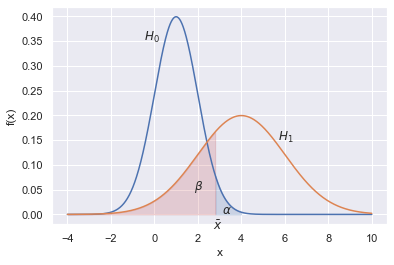

In [7]:
#Example
#H_0: The sample comes from a normal distribution with sigma=1 and x_bar=1
#H_1: The sample comes from a normal distribution with sigma=2 and x_bar=4

#The lower \alpha, the higher \beta.

x=np.linspace(-4,10,1000)

H_0=stats.norm.pdf(x,loc=1,scale=1)

fig=plt.plot(x,H_0)
plt.xlabel("x")
plt.ylabel("f(x)")

X_bar=2.8

plt.fill_between(
        x= x, 
        y1= H_0, 
        where= (x > X_bar)&(x < 4),
        color= "b",
        alpha= 0.2)

H_1=stats.norm.pdf(x,loc=4,scale=2)

plt.plot(x,H_1)

plt.fill_between(
        x= x, 
        y1= H_1, 
        where= (-4 < x)&(x < X_bar),
        color= "r",
        alpha= 0.2)
        

plt.text(-0.5,0.35,r'$H_0$')
plt.text(5.7,0.15,r'$H_1$')
plt.text(2.7,-0.03,r'$\bar{x}$')
plt.text(1.8,0.05,r'$\beta$')
plt.text(3.1,0.001,r'$\alpha$')

plt.show()


### Example

Can we detect cancerous cells?

Microfluidic measurement of cell density, $\rho$.

The healthy cells are normally distributed. 

What is the probability to detect a normal cell of a certain density?

What is the probability that a normal cell is super dense, super heavy, over some value of $\rho$ for a given $\alpha$.

What is the proability to declare a normal cell as cancerous.

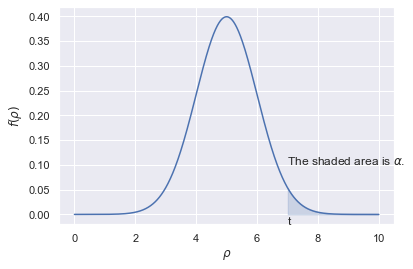

In [17]:
#Let's find the probability of \rho>t
#In other words calculate the integral

x=np.linspace(0,10,1000)
std_normal_pdf=stats.norm.pdf(x,loc=5,scale=1)

fig=plt.plot(x,std_normal_pdf)
plt.xlabel(r"$\rho$")
plt.ylabel(r"$f(\rho)$")

t=7.0

plt.fill_between(
        x= x, 
        y1= std_normal_pdf, 
        where= (t < x)&(x < 10),
        color= "b",
        alpha= 0.2)
        

plt.text(t,0.1,r'The shaded area is $\alpha$.')
plt.text(t,-0.02,'t')


plt.show()


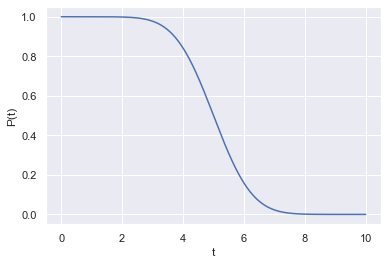

In [20]:
#The probability to measure a normal cell density greater than t
#Right tailed test

t=np.linspace(0,10,1000)
std_normal_cdf=stats.norm.cdf(t,loc=5,scale=1)

fig=plt.plot(x,1-std_normal_cdf)
plt.xlabel("t")
plt.ylabel("P(t)")

plt.show()


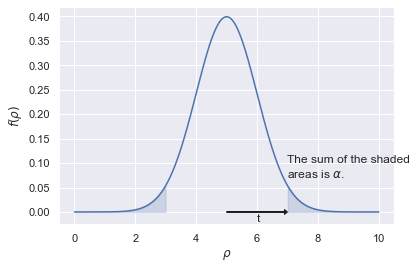

In [42]:
#Let's find the probability of \rho>mean+t or \rho<mean-t
#In other words calculate the integral

x=np.linspace(0,10,1000)
std_normal_pdf=stats.norm.pdf(x,loc=5,scale=1)

fig=plt.plot(x,std_normal_pdf)
plt.xlabel(r"$\rho$")
plt.ylabel(r"$f(\rho)$")

t=2.0

plt.fill_between(
        x= x, 
        y1= std_normal_pdf, 
        where= (5+t<x)&(x<10),
        color= "b",
        alpha= 0.2)
        
plt.fill_between(
        x= x, 
        y1= std_normal_pdf, 
        where= (0<x)&(x<5-t),
        color= "b",
        alpha= 0.2)

plt.text(7,0.1,r'The sum of the shaded')
plt.text(7,0.07,r'areas is $\alpha$.')
plt.text(6,-0.02,'t')
plt.arrow(5,0,1.9,0, color='k',head_width=0.01, head_length=0.1)

plt.show()


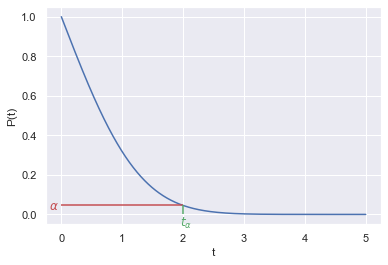

In [72]:
#Double-sided test

t=np.linspace(0,5,1000)
P=2.0*(1-stats.norm.cdf(5+t,loc=5,scale=1))


fig,ax =plt.subplots()
ax.plot(t,P)
plt.xlabel("t")
plt.ylabel("P(t)")
ax.hlines(y=0.05,xmin=0,xmax=2,color='r')
ax.vlines(x=2,ymin=0,ymax=0.05,color='g')
plt.text(-0.2,0.025,r'$\alpha$',color='r')
plt.text(1.95,-0.06,r'$t_\alpha$',color='g')
plt.show()


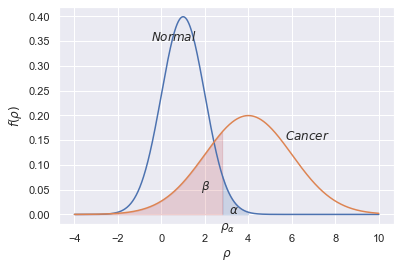

In [77]:
#Example
#H_0: The sample comes from a normal distribution with sigma=1 and x_bar=1
#H_1: The sample comes from a normal distribution with sigma=2 and x_bar=4

x=np.linspace(-4,10,1000)

H_0=stats.norm.pdf(x,loc=1,scale=1)

fig=plt.plot(x,H_0)
plt.xlabel(r"$\rho$")
plt.ylabel(r"$f(\rho)$")

X_bar=2.8

plt.fill_between(
        x= x, 
        y1= H_0, 
        where= (X_bar < x)&(x < 4),
        color= "b",
        alpha= 0.2)

H_1=stats.norm.pdf(x,loc=4,scale=2)

plt.plot(x,H_1)

plt.fill_between(
        x= x, 
        y1= H_1, 
        where= (-4 < x)&(x < X_bar),
        color= "r",
        alpha= 0.2)
        

plt.text(-0.5,0.35,r'$Normal$')
plt.text(5.7,0.15,r'$Cancer$')
plt.text(2.7,-0.03,r'$\rho_\alpha$')
plt.text(1.8,0.05,r'$\beta$')
plt.text(3.1,0.001,r'$\alpha$')

plt.show()


The level of confidence $\alpha$ is not the same as $\beta$ ($1-\beta$ also is called the $\bf{Power}$). 

What is the best value of $\alpha$ for the test?

## Confusion table

Recall the hypothesis table from above:

|$H_0$|    Don't reject $H_0$| Reject $H_0$| 
|-|-|-|
|$H_0$ is True|$1-\alpha$|$\alpha$|
|$H_0$ is False|$\beta$| $1-\beta$|

In this case it is detection, but the idea is the same:


|Cell|    Declare Normal|Declare Cancer | 
|-|-|-|
|Normal|$1-\alpha$|$\alpha$|
|Cancer|$\beta$| $1-\beta$|

#### Confusion table:

|Cell|    Declare Normal|Declare Cancer | 
|-|-|-|
|Normal|True Negative|False Positive|
|Cancer|False Negative|True Positive|


|Cell|    Declare Normal|Declare Cancer | 
|-|-|-|
|Normal|No Error|Type I Error|
|Cancer|Type II Error|No Error|


Notation for numbers of individuals in a tested population:

|Cell|    Declare Normal|Declare Cancer | 
|-|-|-|
|Normal|TN|FP|
|Cancer|FN|TP|


We can define:

Specificity - Probability to detect normal (if normal). True Negative Rate (TNR).

$Specificity=\frac{TN}{TN+FP}=\frac{TN}{N}$

Sensitivity - Probability to detect cancer (if cancer). True Positive rate (TPR).

$Sensitivity=\frac{TP}{TP+FN}=\frac{TP}{P}$


True positives rate: Same as Sensitivity.

$TPR=\frac{TP}{TP+FN}=\frac{TP}{P}$

False positives rate: 1-TNR, or 1-Specificity


$FPR=\frac{FP}{TN+FP}=\frac{FP}{N}$




#ROC
https://en.wikipedia.org/wiki/Receiver_operating_characteristic


### Reciever Operating Characteristic

FPR vs. TPR

or 

1-Sensitivity vs. Specificity


<img src="Roc_curve.svg.png" alt="OF" width="400"/>



<img src="Receiver_Operating_Characteristic.png" width="600"/>


#### Hypothesis testing:

|Cell|    Declare Normal|Declare Cancer | 
|-|-|-|
|Normal|$1-\alpha$|$\alpha$|
|Cancer|$\beta$| $1-\beta$|


#### Confusion table:

|Cell|    Declare Normal|Declare Cancer | 
|-|-|-|
|Normal|True Negative|False Positive|
|Cancer|False Negative|True Positive|


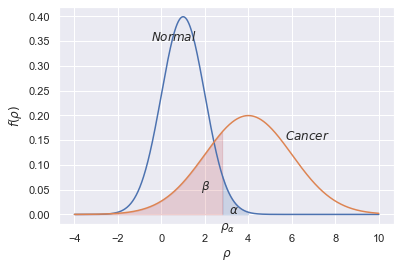

In [5]:

x=np.linspace(-4,10,1000)

H_0=stats.norm.pdf(x,loc=1,scale=1)

fig=plt.plot(x,H_0)
plt.xlabel(r"$\rho$")
plt.ylabel(r"$f(\rho)$")

X_bar=2.8

plt.fill_between(
        x= x, 
        y1= H_0, 
        where= (X_bar < x)&(x < 4),
        color= "b",
        alpha= 0.2)

H_1=stats.norm.pdf(x,loc=4,scale=2)

plt.plot(x,H_1)

plt.fill_between(
        x= x, 
        y1= H_1, 
        where= (-4 < x)&(x < X_bar),
        color= "r",
        alpha= 0.2)
        

plt.text(-0.5,0.35,r'$Normal$')
plt.text(5.7,0.15,r'$Cancer$')
plt.text(2.7,-0.03,r'$\rho_\alpha$')
plt.text(1.8,0.05,r'$\beta$')
plt.text(3.1,0.001,r'$\alpha$')

plt.show()


### Example: Tect for cancer detection

Specificity = 0.99 or 99%

This means:

TN=0.99

FP=0.01

Sensitivity = 0.9

TP=0.9

FN=0.1


Let's test two patients: 30 years old and a 60 years old.

#### 30 years old patient

The prevalence of cancer in 30 years old patients is 
0.0001 or 0.01%. This is the probability to have cancer or Positive.

What is the FPR or  in this case?
